<a href="https://colab.research.google.com/github/MuhammadHassan667410/Learning-Complete-Artificial-Intelligence/blob/main/Phase%202%20%3A%20Machine%20Learning/Supervised%20ML(Regression%20and%20Classification)/KNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN - Predict whether a person have diabetes or not

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('KNN_Dataset.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Replace zeros in important columns as they will effect the result with mean value of the colunm
zeros_not_accepted = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'SkinThickness']
for colunm in zeros_not_accepted:
    data[colunm] = data[colunm].replace(0, np.nan)
    mean = int(data[colunm].mean(skipna=True))
    data[colunm] = data[colunm].replace(np.nan, mean)

In [ ]:
y = data['Outcome']
x = data.drop(['Outcome'], axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

In [ ]:
# select n_neighbors
import math
math.sqrt(len(y_test)) # chose an odd, so, in this, 11

12.409673645990857

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
KNN.fit(x_train, y_train)

,n_neighbors,11
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [ ]:
y_pred = KNN.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy = {acc: .2f}')

Accuracy =  0.82


In [ ]:
cf = classification_report(y_test, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.74      0.66      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[96, 11],
       [16, 31]])

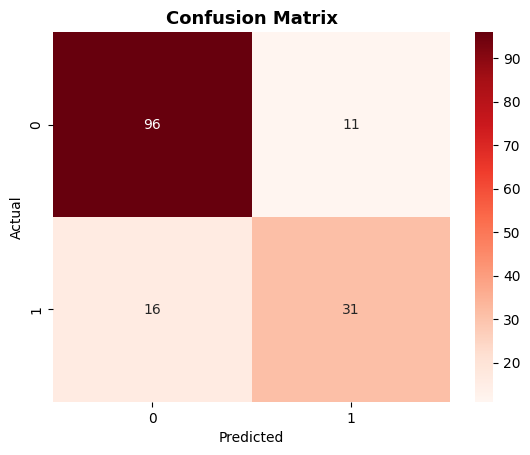

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Reds')
import matplotlib.pyplot as plt
plt.title('Confusion Matrix', fontweight='bold', fontsize=13)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()